In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [47]:
dataset=load_iris()

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [16]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
np.unique(dataset.target,return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

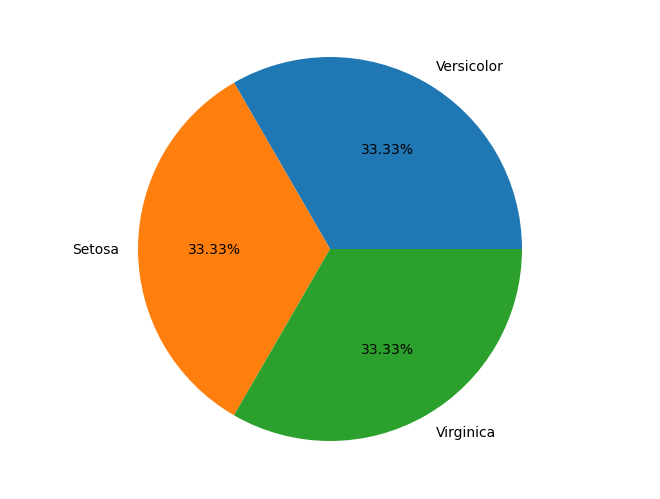

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

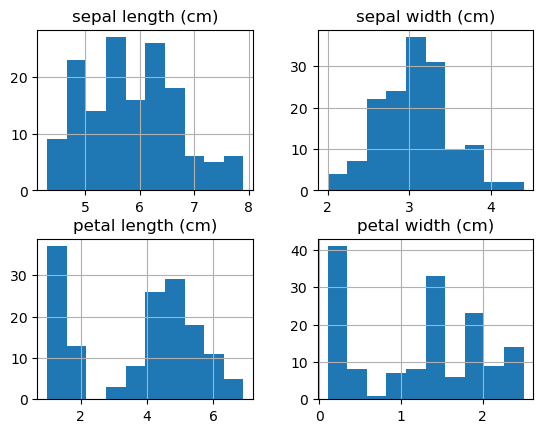

In [30]:
df.hist()

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

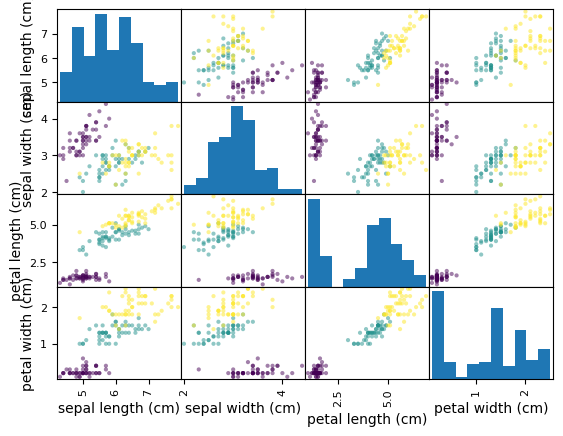

In [41]:
pd.plotting.scatter_matrix(df,c=dataset.target)

<Axes: >

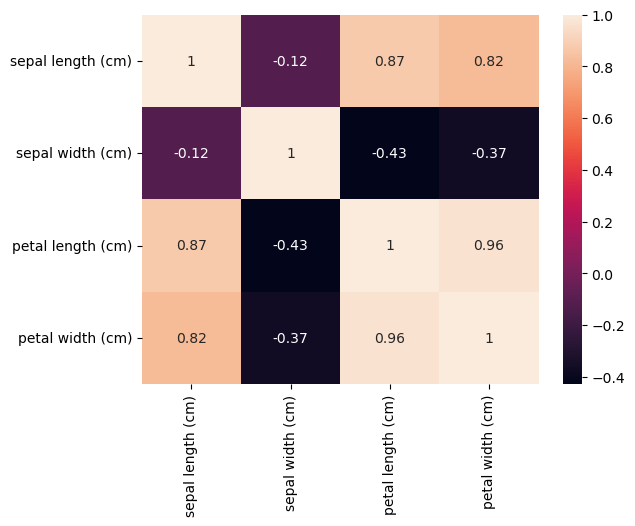

In [45]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

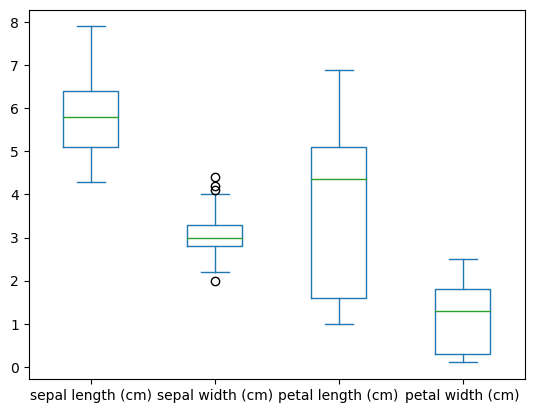

In [97]:
df.plot(kind='box')

In [50]:
x=dataset.data
y=dataset.target


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [53]:
x_train.shape
y_train.shape

(105,)

In [102]:
linear_model=LogisticRegression(solver='liblinear',multi_class='ovr')

In [103]:
linear_model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [104]:
y_pred=linear_model.predict(x_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9111111111111111


In [101]:
cun_ma=metrics.confusion_matrix(y_test,y_pred)
print(cun_ma)
print(metrics.classification_report(y_test,y_pred))

[[14  0  0]
 [ 0 12  4]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.75      0.86        16
           2       0.79      1.00      0.88        15

    accuracy                           0.91        45
   macro avg       0.93      0.92      0.91        45
weighted avg       0.93      0.91      0.91        45



In [77]:
svm_model=svm.SVC()

In [78]:
svm_model.fit(x_train,y_train)

SVC()

In [79]:
metrics.accuracy_score(y_test,y_pred)

0.9333333333333333

In [105]:
knn_model=KNeighborsClassifier()

In [106]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [111]:
y_pred=knn_model.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

1.0
[[14  0  0]
 [ 0 16  0]
 [ 0  0 15]]


In [88]:
des_model=DecisionTreeClassifier()

In [89]:
des_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [91]:
y_pred=des_model.predict(x_test)

In [92]:
print(metrics.accuracy_score(y_test,y_pred))

0.9555555555555556


'versicolor'